## Human and Bot Data Analysis 

In this notebook I have taken a deeper look into the traffic logs for Trivago website. 
I've looked at the data from different aspects such as devices, brands, browsers, types of bots and locations. 

The csv file data is as follows:

- @timestamp : Time of request
- user_agent : User agent – browser identification
- page_id : Internal trivago value to target_url response. Relationship between target_url and page_id is n to 1
- target_url : Information about URL of request
- geoip.country_code2 : Geolocation information from IP
- tracking_ident : User cookie, unique to the browser

In [554]:
#Imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from user_agents import parse
import numpy as np
%matplotlib inline

In [555]:
# Read file

df = pd.read_csv('log_data.csv', sep=',')

### Data Exploration and Visualization

In [556]:
df.head()

,@timestamp,user_agent,page_id,target_url,geoip.country_code2,tracking_ident
0,"April 9th 2018, 16:10:00.000",Mozilla/5.0 (compatible; Exabot/3.0; +http://www.exabot.com/go/robot),2116,http://www.trivago.com.au/sao-paulo-79447/hotel/paulista-center--894195,FR,Sm9Zs0R6N7m4EdL1Jboc7wdmjf
1,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239...",2116,http://www.trivago.com.au/?aDateRange%5Barr%5D=2018-05-05&aDateRange%5Bdep%5D=2018-05-07&aPriceRa...,AU,mGNpYlfD917xlO2QmZ2kA9nCBW
2,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Ve...",2113,http://www.trivago.com.au/?iSemThemeId=6238&iPathId=31625,US,77qWbl2kEYjxd8gt2T8S0ld5EB
3,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Ve...",2100,http://www.trivago.com.au/?geo_distance_item=1945319453,US,0uV993NMW9D8cMzrm50h1s24xT
4,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239...",2200,http://www.trivago.com.au/search/rpc/currency/AUD.html,AU,3PmQ32U2DJw0b46XftP9kTrBa6


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13934 entries, 0 to 13933
Data columns (total 6 columns):
@timestamp             13934 non-null object
user_agent             13934 non-null object
page_id                13934 non-null int64
target_url             13934 non-null object
geoip.country_code2    13934 non-null object
tracking_ident         13931 non-null object
dtypes: int64(1), object(5)
memory usage: 653.2+ KB


After reviewing the columns of the dataset above, I will first begin by parsing the user agents to get the following data for each entry:

- Device
- Model
- Brand
- Browser
- Whether it is a PC, Tablet or Mobile
- Whether it is a Bot

In [558]:
df['user_agent_parsed'] = df['user_agent'].apply(lambda x: str(parse(x)))
df['user_agent_parsed_obj'] = df['user_agent'].apply(lambda x: parse(x))
df['is_bot'] = df['user_agent_parsed_obj'].apply(lambda x: x.is_bot)
df['device'] = df['user_agent_parsed_obj'].apply(lambda x: x.device.model)
df['device_brand'] = df['user_agent_parsed_obj'].apply(lambda x: x.device.brand)
df['browser'] = df['user_agent_parsed_obj'].apply(lambda x: x.browser.family)
df['os'] = df['user_agent_parsed_obj'].apply(lambda x: x.os.family)
df['is_pc'] = df['user_agent_parsed_obj'].apply(lambda x: x.is_pc)
df['is_mobile'] = df['user_agent_parsed_obj'].apply(lambda x: x.is_mobile)
df['is_tablet'] = df['user_agent_parsed_obj'].apply(lambda x: x.is_tablet)


In [559]:
# Get the total number of unique user agents we are working with 

df['user_agent'].nunique()

279

In [560]:
# Updated dataframe review

df.head()

,@timestamp,user_agent,page_id,target_url,geoip.country_code2,tracking_ident,user_agent_parsed,user_agent_parsed_obj,is_bot,device,device_brand,browser,os,is_pc,is_mobile,is_tablet
0,"April 9th 2018, 16:10:00.000",Mozilla/5.0 (compatible; Exabot/3.0; +http://www.exabot.com/go/robot),2116,http://www.trivago.com.au/sao-paulo-79447/hotel/paulista-center--894195,FR,Sm9Zs0R6N7m4EdL1Jboc7wdmjf,Spider / Other / Exabot 3.0,Spider / Other / Exabot 3.0,True,Desktop,Spider,Exabot,Other,False,False,False
1,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239...",2116,http://www.trivago.com.au/?aDateRange%5Barr%5D=2018-05-05&aDateRange%5Bdep%5D=2018-05-07&aPriceRa...,AU,mGNpYlfD917xlO2QmZ2kA9nCBW,PC / Windows 10 / Chrome 63.0.3239,PC / Windows 10 / Chrome 63.0.3239,False,None,None,Chrome,Windows,True,False,False
2,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Ve...",2113,http://www.trivago.com.au/?iSemThemeId=6238&iPathId=31625,US,77qWbl2kEYjxd8gt2T8S0ld5EB,Spider / iOS 9.1 / AdsBot-Google,Spider / iOS 9.1 / AdsBot-Google,True,Smartphone,Spider,AdsBot-Google,iOS,False,True,False
3,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Ve...",2100,http://www.trivago.com.au/?geo_distance_item=1945319453,US,0uV993NMW9D8cMzrm50h1s24xT,Spider / iOS 9.1 / AdsBot-Google,Spider / iOS 9.1 / AdsBot-Google,True,Smartphone,Spider,AdsBot-Google,iOS,False,True,False
4,"April 9th 2018, 16:10:00.000","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239...",2200,http://www.trivago.com.au/search/rpc/currency/AUD.html,AU,3PmQ32U2DJw0b46XftP9kTrBa6,PC / Windows 10 / Chrome 63.0.3239,PC / Windows 10 / Chrome 63.0.3239,False,None,None,Chrome,Windows,True,False,False


In [561]:
# I will remove the following entries as we can't parse the device information from the user agent, 
# all remaining devices set to 'None' are PC

df.loc[(df['device'].isnull()) & (df['is_pc']==False)]

,@timestamp,user_agent,page_id,target_url,geoip.country_code2,tracking_ident,user_agent_parsed,user_agent_parsed_obj,is_bot,device,device_brand,browser,os,is_pc,is_mobile,is_tablet
2110,"April 9th 2018, 16:08:35.000",Mozilla/4.0 (compatible;),2100,http://www.trivago.com.au/,US,Ef43szvBj7r3Qq7r3Y3261kIpH,Other / Other / Other,Other / Other / Other,False,None,None,Other,Other,False,False,False
6842,"April 9th 2018, 16:05:28.000",Carbon,2100,http://www.trivago.com.au/,KR,f0Y0S0n92LzQBy174UfI3Fk7CB,Other / Other / Other,Other / Other / Other,False,None,None,Other,Other,False,False,False
9090,"April 9th 2018, 16:04:01.000",Mozilla/4.0 (compatible;),2100,http://www.trivago.com.au/,US,I9w8X0YH82TyLvTE5xtBZq3t5y,Other / Other / Other,Other / Other / Other,False,None,None,Other,Other,False,False,False


In [562]:
# Drop the rows

df = df.drop([2110,6842,9090])

In [563]:
# Replace the NaN with PC for all the rest of the entries

df['device'].fillna('PC', inplace=True)

In [564]:
# Change 'Desktop to 'Bot' for all parsed items

df['device'] = df['device'].apply(lambda x: 'Bot' if x == 'Desktop' else x)

### Top 10 user agents 

Below, I have calculated the top user agents with the largest amount of traffic and the number of requests per user agent

In [565]:
df['user_agent_parsed'].value_counts()[:10]

PC / Windows 10 / Chrome 63.0.3239          7756
Spider / Other / AdsBot-Google              2000
Spider / iOS 9.1 / AdsBot-Google            1178
Spider / Other / Googlebot 2.1              1000
Spider / Other / bingbot                     124
iPhone / iOS 11.2.6 / Mobile Safari 11.0      93
PC / Windows 10 / Chrome 65.0.3325            91
PC / Windows 7 / IE 11.0                      84
PC / Mac OS X 10.12 / Firefox 56.0            81
Spider / Other / bingbot 2.0                  65
Name: user_agent_parsed, dtype: int64

Text(0.5,0,'Total Requests')

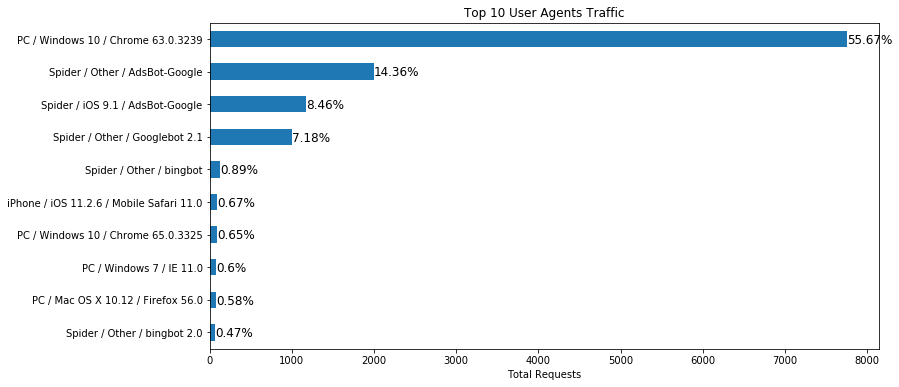

In [566]:
# Plot above list of top user agents

fig, ax = plt.subplots(figsize=(12,6))
df.user_agent_parsed.value_counts().nlargest(10).plot(kind='barh', ax=ax)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
    
total = df.user_agent_parsed.count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

plt.title('Top 10 User Agents Traffic')
plt.xlabel('Total Requests')

We can clearly see from the above plot that the top requests are from Windows 10 PCs using Chrome browser version 63. 
But we can see there are requests from Windows 10 Pcs using Chrome version 65 too. It would be good to review this again based on devices and browsers without looking at the versions. I will show this over the next few plots. 

Another point to note here is that the 2nd and 3rd most requests are from the AdsBot-Google bot but the only difference is that while 8.46% requests were from an iOS device, we cannot parse the device information for the remaining 14.36% from the user agent. Again, here it would be good to combine these and review again just by bot type. I will show this in the following plots as well. 

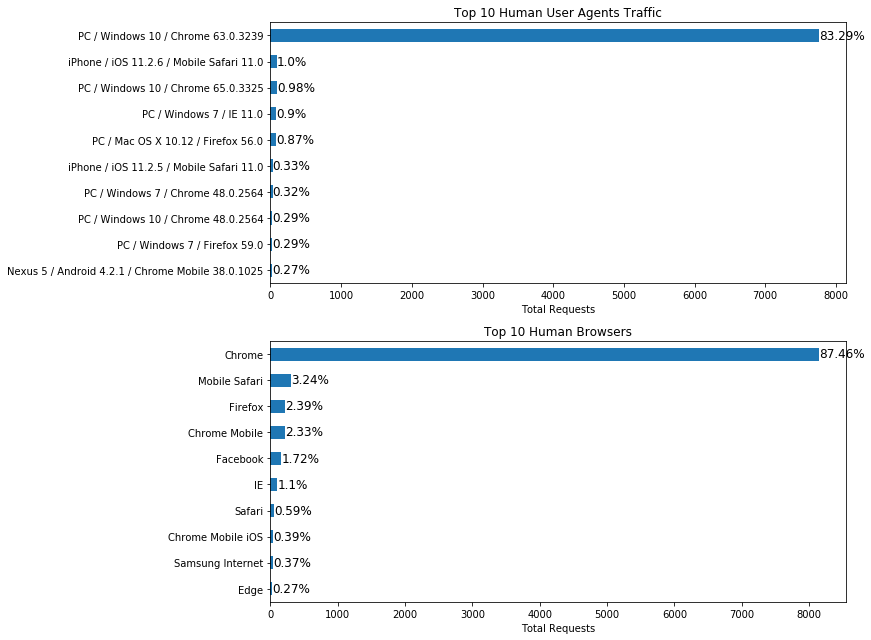

In [567]:
# Plot showing top 'human' user agents 

fig, ax = plt.subplots(2,1,figsize=(12,9))
df.loc[df['is_bot']==False].user_agent_parsed.value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

totals = []
for i in ax[0].patches:
    totals.append(i.get_width())

total = df.loc[df['is_bot']==False].user_agent_parsed.count()

for i in ax[0].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[0].text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

ax[0].invert_yaxis()
ax[0].set_title('Top 10 Human User Agents Traffic')
ax[0].set_xlabel('Total Requests')

# Plot showing top 'human' browsers 

df.loc[df['is_bot']==False].browser.value_counts().nlargest(10).plot(kind='barh', ax=ax[1])

totals = []
# find the values and append to list
for i in ax[1].patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = df.loc[df['is_bot']==False].browser.count()

# set individual bar lables using above list
for i in ax[1].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[1].text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

# invert for largest on top 
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Human Browsers')
ax[1].set_xlabel('Total Requests')

plt.tight_layout()

As we can see above, most people prefer to use Chrome browsers and a bog chunk of them use Windows 10. Second most popular (although the difference is pretty significant) is using the Safari brower on Iphones. 

Below, I will plot a pie chart showing the breakdown between Mobile, Tablet and PCs. 

Text(0.5,1,'Requests by Devices')

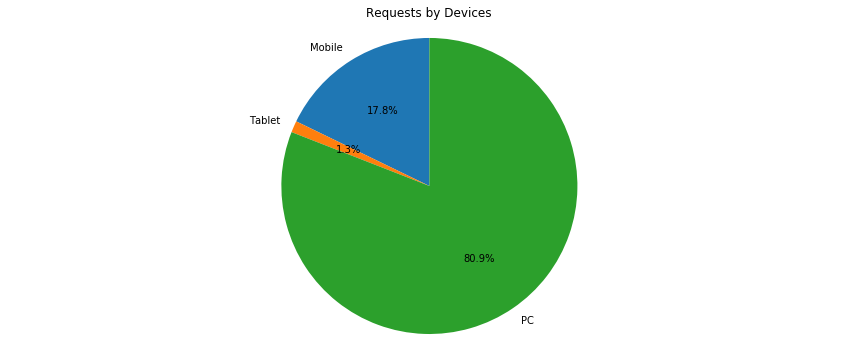

In [568]:
labels = 'Mobile', 'Tablet', 'PC'
sizes = [df['is_mobile'].sum(), df['is_tablet'].sum(), df['is_pc'].sum()]

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  


plt.title('Requests by Devices')

As suspected, PCs take the lead in choice of device, followed by Mobile devices. 

It would be good to review the brands that peeple are partial to next.

Text(0.5,0,'Total Requests')

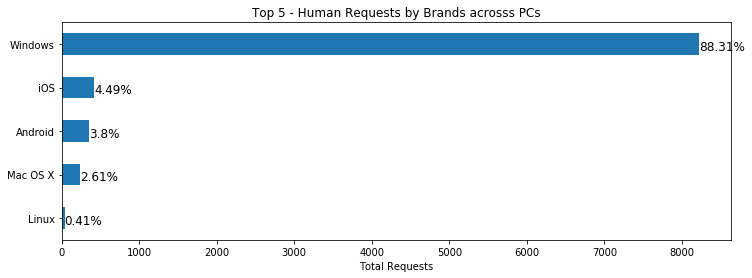

In [569]:
# Plot of total human requests by brand across PCs

fig2, ax2 = plt.subplots(figsize=(12,4))
df.loc[df['device_brand'] != 'Spider'].os.value_counts().nlargest(5).plot(kind='barh', ax=ax2)

totals = []
for i in ax2.patches:
    totals.append(i.get_width())

total = df.loc[(df['device_brand'] != 'Spider')].os.count()

for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

# invert for largest on top 
ax2.invert_yaxis()

plt.title('Top 5 - Human Requests by Brands acrosss PCs')
plt.xlabel('Total Requests')

Text(0.5,0,'Total Requests')

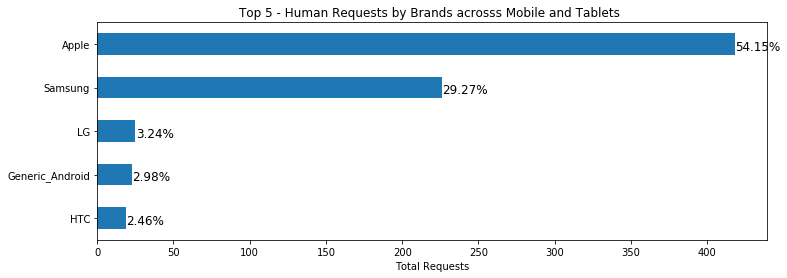

In [570]:
# Plot of total human requests by brand across mobile and tablets 

fig2, ax2 = plt.subplots(figsize=(12,4))
df.loc[df['device_brand'] != 'Spider'].device_brand.value_counts().nlargest(5).plot(kind='barh', ax=ax2)

totals = []
for i in ax2.patches:
    totals.append(i.get_width())

total = df.loc[(df['device_brand'] != 'Spider')].device_brand.count()

for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

# invert for largest on top 
ax2.invert_yaxis()

plt.title('Top 5 - Human Requests by Brands acrosss Mobile and Tablets ')
plt.xlabel('Total Requests')

Text(0.5,1,'Top Human Requests on Tablets by Brands')

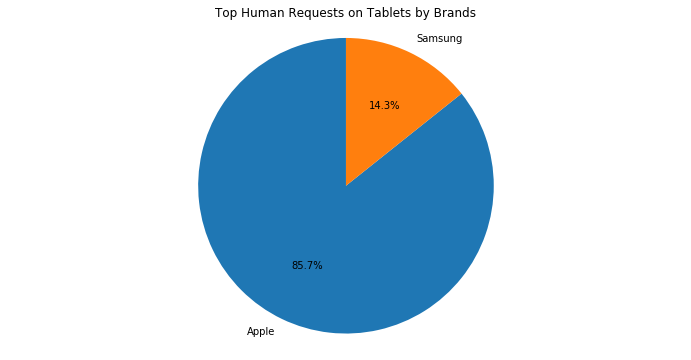

In [571]:
# Tablets are dominated by  only two brands as seen in the plot below

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(df.loc[(df['device_brand'] != 'Spider')  &(df['is_tablet'] == True)].device_brand.value_counts(), labels=df.loc[(df['device_brand'] != 'Spider')  &(df['is_tablet'] == True)].device_brand.value_counts().index.tolist(), autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  

plt.title('Top Human Requests on Tablets by Brands')


I will now take a closer look at the Bots traffic. I will first find out which are the top bots in terms of requests.

Text(0.5,0,'Total Requests')

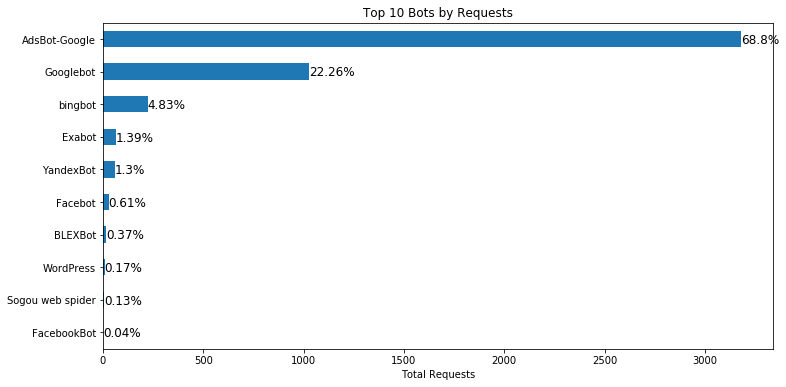

In [572]:
# Plot bots by number of requests

fig3, ax3 = plt.subplots(figsize=(12,6))
df.loc[df['device_brand'] == 'Spider'].browser.value_counts().nlargest(10).plot(kind='barh', ax=ax3)

totals = []
for i in ax3.patches:
    totals.append(i.get_width())

total = df.loc[df['device_brand'] == 'Spider'].browser.count()

for i in ax3.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax3.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

# invert for largest on top 
ax3.invert_yaxis()

plt.title('Top 10 Bots by Requests')
plt.xlabel('Total Requests')

Looks like the top 2 bots are by Google. Looking at the google user agent documentation, we can see that AdsBot is specifically used to check the desktop web page ad quality. 

It would be good to see which country the bots are originating from. The following plot shows this.

In [573]:
# Create df grouped by country

countryBots = df.groupby('geoip.country_code2').is_bot.sum().sort_values(ascending=False)

In [574]:
countryBots.nlargest(5)

geoip.country_code2
US    4505.0
FR      64.0
RU      25.0
DE      17.0
CN       6.0
Name: is_bot, dtype: float64

Text(0,0.5,'Countries')

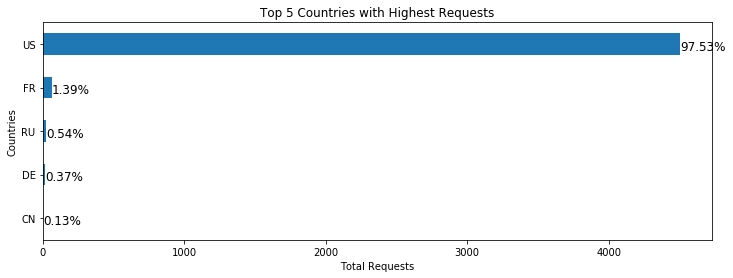

In [575]:
# Plot showing bots by originating countries

fig3, ax3 = plt.subplots(figsize=(12,4))
countryBots.nlargest(5).plot(kind='barh', ax=ax3)

totals = []
for i in ax3.patches:
    totals.append(i.get_width())

total = countryBots.sum()

for i in ax3.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax3.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)
    
ax3.invert_yaxis()

plt.title('Top 5 Countries with Highest Requests')
plt.xlabel('Total Requests')
plt.ylabel('Countries')

US has the maximum number of Bot requests. 

But what about human traffic. Which country is leading in this? I will check this next. 

In [576]:
# Create df for requests by humans by country 

countryTraffic = df.loc[df['is_bot']==False].groupby('geoip.country_code2')[['is_pc', 'is_tablet', 'is_mobile']].sum()

In [577]:
countryTraffic['total'] = countryTraffic['is_pc'] + countryTraffic['is_tablet'] + countryTraffic['is_mobile']

In [578]:
countryTraffic = countryTraffic.drop(['is_pc', 'is_tablet', 'is_mobile'], axis=1)

In [579]:
countryTraffic.nlargest(5, columns='total')

,total
geoip.country_code2,
AU,8702.0
IE,154.0
US,63.0
CA,59.0
HK,52.0


Text(0,0.5,'Countries')

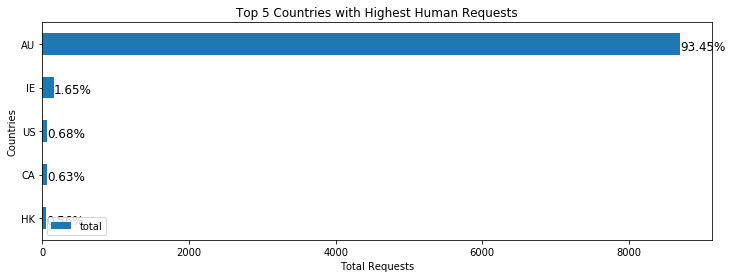

In [580]:
# Plot of human requests by country

fig4, ax4 = plt.subplots(figsize=(12,4))
countryTraffic.nlargest(5, columns='total').plot(kind='barh', ax=ax4)

totals = []
for i in ax4.patches:
    totals.append(i.get_width())

total = countryTraffic.sum()[0]

for i in ax4.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax4.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12)

ax4.invert_yaxis()

plt.title('Top 5 Countries with Highest Human Requests')
plt.xlabel('Total Requests')
plt.ylabel('Countries')

Surprisingly, the highest number of requests are coming from Australia and the US. Most of the traffic from US is bots (4505 requests) while humans only account for only 63 requests.

In [581]:
print('US Bots: ', df.loc[(df['geoip.country_code2']=='US') & (df['is_bot']==True)].user_agent.count())
print('US People: ', df.loc[(df['geoip.country_code2']=='US') & (df['is_bot']==False)].user_agent.count())

US Bots:  4505
US People:  63


Now, I want to look at the time stamp and see if any useful information can be extracted from it. 

In [582]:
# Convert column to datetime object

df['@timestamp'] = pd.to_datetime(df['@timestamp'])

In [583]:
df = df.set_index(['@timestamp'], drop=False)

Text(0.5,0,'Time')

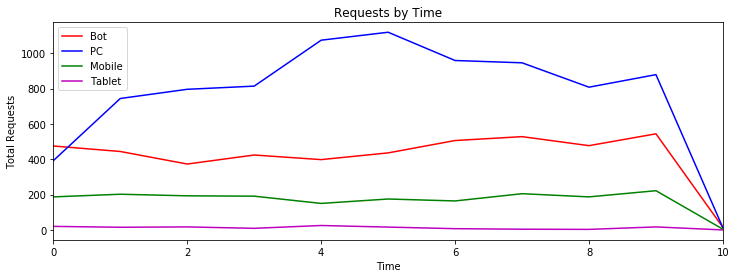

In [584]:
fig5, ax5 = plt.subplots(figsize=(12,4))
df.groupby(df.index.minute).is_bot.sum().plot(color='r', ax=ax5, label='Bot')
df.groupby(df.index.minute).is_pc.sum().plot(color='b', ax=ax5, label='PC')
df.groupby(df.index.minute).is_mobile.sum().plot(color='g', ax=ax5, label='Mobile')
df.groupby(df.index.minute).is_tablet.sum().plot(color='m', ax=ax5, label='Tablet')
plt.legend()

plt.title('Requests by Time')
plt.ylabel('Total Requests')
plt.xlabel('Time')

The data requests are only over a period of 10 minutes. The plot above shows the total requests by devices but unfortunately it is too short a time to discern any trend. I belive that should there be more data available over a much longer period of time, we might see a trend in the way the bots are making a requests through perhaps regular intervals for instance.  

In [585]:
df = df.reset_index(drop=True)

Observations made through this exercise:

1. Most people access the Trivago website using a PC
2. The top PC of choice is Windows
3. US has more bot requests than humans
4. Australia has the most human requests
5. Apple is the choice of brand across all mobile and tablet devices followed by Samsung
6. Googlebot and AdsBot by Google are the top bots making requests on Trivago

This brings me to the end of this exploration data analysis of the logs for Trivago website. 